In [1]:
import matplotlib.pyplot as plt
import random
from rpmml_project.skip_diffuser.dataset import MinariTrajectoryFlatDataset
from matplotlib.patches import Rectangle
import mujoco

In [2]:
flat_dataset = MinariTrajectoryFlatDataset(
    dataset_name="D4RL/pointmaze/umaze-v2",
    horizon=32
)

In [3]:
env = flat_dataset.get_env()

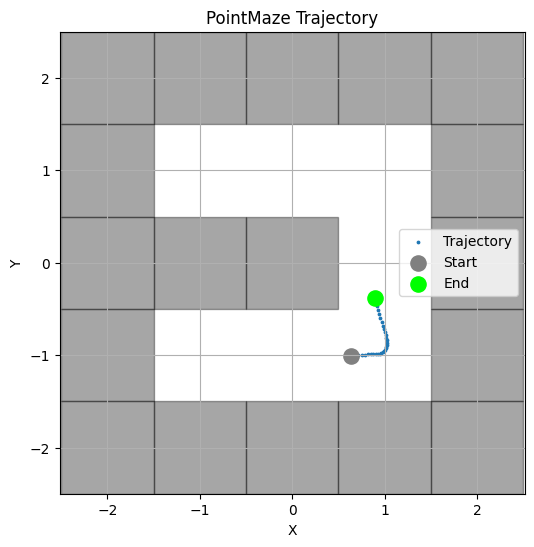

In [4]:
# Sample a trajectory window
idx = random.randint(0, len(flat_dataset) - 1)
traj_norm = flat_dataset[idx]
xy = flat_dataset.denormalize_flat(traj_norm).numpy()

# Plot the trajectory
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(xy[:, 0], xy[:, 1], s=3, label='Trajectory')
ax.scatter(xy[0, 0], xy[0, 1], c='gray', s=120, label='Start')
ax.scatter(xy[-1, 0], xy[-1, 1], c='lime', s=120, label='End')

# Render MuJoCo walls
for geom_id in range(env.model.ngeom):

    # Get geom name
    name = mujoco.mj_id2name(env.model, mujoco.mjtObj.mjOBJ_GEOM, geom_id)

    if name is None or not "block" in name:
        continue

    pos = env.model.geom_pos[geom_id]
    size = env.model.geom_size[geom_id]

    cx, cy = pos[:2]
    halfx, halfy = size[:2]

    rect = Rectangle(
        (cx - halfx, cy - halfy),
        2 * halfx,
        2 * halfy,
        color="black",
        alpha=0.35,
        zorder=0
    )
    ax.add_patch(rect)

# Final figure styling
ax.set_title("PointMaze Trajectory")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.axis("equal")
ax.grid(True)
ax.legend()
plt.xlim(-2.5, +2.5)
plt.ylim(-2.5, +2.5)

# plt.show()
plt.savefig("trajectory.png")

In [35]:
import numpy as np
flat_state = xy

In [44]:
dt = 0.01
m = 0.0424
vel = (flat_state[1:,:]-flat_state[:-1,:])/dt
vel = np.vstack([2 * vel[0] - vel[1], vel])
full_state = np.hstack([xy, vel])
accel = m * (vel[1:,:]-vel[:-1,:])/dt

In [45]:

accel / action_tens[1:, :]

tensor([[  1.0520,   1.0087],
        [  1.0520,   2.0786],
        [  1.0495,  -0.7364],
        [  1.0469,   1.6335],
        [  1.6208,   0.8461],
        [  0.6829,  -1.3202],
        [  1.0403,  -0.3566],
        [  1.0379,  -0.9337],
        [  1.0354,   1.0104],
        [  1.0329,   1.0080],
        [  1.0305,   1.0056],
        [  1.0280,   1.0032],
        [  1.0256,   1.0009],
        [  1.0231,   0.9985],
        [  1.0207,   0.9961],
        [  1.0183,   0.9937],
        [  1.0158,   0.9914],
        [  1.0134,   0.9890],
        [  1.0110,   0.9866],
        [  1.0086,   0.9843],
        [  1.0062,   0.9820],
        [  1.0038,   0.9796],
        [  1.0014,   0.9773],
        [  2.2127,   0.9750],
        [-11.1705,   0.9726],
        [  0.0724,   0.9703],
        [  3.2345,   0.9680],
        [ -0.4867,  -1.2513],
        [ -1.6786,  -1.4851],
        [  1.1511,  -0.6003],
        [ -2.7192,   1.2549]], dtype=torch.float64)

In [25]:
action_tens = flat_dataset.get_full_unnormalized_action(idx)
action_tens

tensor([[-0.2859,  0.7519],
        [-1.0000,  0.8601],
        [-1.0000,  0.4173],
        [-1.0000, -0.5681],
        [-1.0000, -0.3537],
        [-0.6444, -0.4253],
        [-1.0000,  0.3267],
        [-1.0000, -0.9230],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-1.0000,  1.0000],
        [-0.4515,  1.0000],
        [ 0.0396,  1.0000],
        [ 0.7496,  1.0000],
        [ 0.2384,  1.0000],
        [-0.5198, -0.7717],
        [ 0.3058,  0.5560],
        [ 0.2794, -0.8613],
        [-0.1082, -0.7294]])

In [5]:
state_tens = flat_dataset.get_full_unnormalized_state(idx)
state_tens

tensor([[ 0.6355, -1.0046,  4.2521, -0.0788],
        [ 0.6773, -1.0036,  4.1739,  0.1005],
        [ 0.7165, -1.0006,  3.9258,  0.3051],
        [ 0.7533, -0.9965,  3.6782,  0.4038],
        [ 0.7876, -0.9938,  3.4313,  0.2675],
        [ 0.8195, -0.9920,  3.1850,  0.1826],
        [ 0.8497, -0.9912,  3.0239,  0.0809],
        [ 0.8775, -0.9896,  2.7786,  0.1585],
        [ 0.9028, -0.9902,  2.5338, -0.0617],
        [ 0.9257, -0.9885,  2.2896,  0.1766],
        [ 0.9462, -0.9843,  2.0460,  0.4144],
        [ 0.9642, -0.9778,  1.8029,  0.6516],
        [ 0.9798, -0.9689,  1.5605,  0.8882],
        [ 0.9930, -0.9577,  1.3186,  1.1242],
        [ 1.0038, -0.9441,  1.0773,  1.3597],
        [ 1.0121, -0.9281,  0.8365,  1.5946],
        [ 1.0181, -0.9099,  0.5964,  1.8290],
        [ 1.0217, -0.8892,  0.3568,  2.0628],
        [ 1.0229, -0.8663,  0.1178,  2.2961],
        [ 1.0216, -0.8410, -0.1207,  2.5287],
        [ 1.0181, -0.8134, -0.3585,  2.7609],
        [ 1.0121, -0.7834, -0.5958

In [20]:
xy

array([[ 0.19311911, -1.00959715],
       [ 0.15260544, -1.00891577],
       [ 0.11456992, -1.00882604],
       [ 0.07900663, -1.00777474],
       [ 0.04590966, -1.00434433],
       [ 0.01527316, -1.00171158],
       [-0.01290873, -1.00109736],
       [-0.03864187, -0.99829313],
       [-0.06193209, -0.99648332],
       [-0.08278518, -0.99548145],
       [-0.101207  , -0.99686363],
       [-0.11720327, -0.99962798],
       [-0.13077982, -1.00227406],
       [-0.1419424 , -1.0032646 ],
       [-0.15069676, -1.00462327],
       [-0.15704862, -1.0058325 ],
       [-0.16100375, -1.00643224],
       [-0.16256779, -1.00797581],
       [-0.16174647, -1.00942179],
       [-0.15854546, -1.01324594],
       [-0.15297046, -1.0151821 ],
       [-0.14502709, -1.01664151],
       [-0.134721  , -1.01639175],
       [-0.12205779, -1.01616697],
       [-0.1070431 , -1.0143538 ],
       [-0.08968258, -1.01231438],
       [-0.06998173, -1.00981018],
       [-0.04794617, -1.00833219],
       [-0.02358148,

In [9]:
v = state_tens[1:, :2] - state_tens[:-1, :2]

In [10]:
v / state_tens[1:, 2:]

tensor([[0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100]])

In [46]:
env2 = flat_dataset.get_env()

In [54]:
env2.reset_pos = xy[:, :2]
env2.reset()

({'observation': array([-0.19661184,  1.07772706,  0.        ,  0.        ]),
  'achieved_goal': array([-0.19661184,  1.07772706]),
  'desired_goal': array([1.24052257, 1.05253998])},
 {'success': False})

In [ ]:
dt = 0.01
m = 0.0424
vel = (flat_state[1:,:]-flat_state[:-1,:])/dt
vel = np.vstack([2 * vel[0] - vel[1], vel])
full_state = np.hstack([xy, vel])
accel = m * (vel[1:,:]-vel[:-1,:])/dt